# Seminario de Ciencia de Datos - Trabajo práctico 5
### de la Fuente, Alethia- Hesse, Eugenia -  Baglivo, Fabricio

#### Configuraciones generales

In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


# Considere el modelo Beta-Binomial para la moneda.
## 1. Implementación: 
 * Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.


In [17]:
#inicialización de parámetros
n = 6
heads = 6
n_iter = 200

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 700/700 [00:00<00:00, 2046.78it/s]
logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 1692.31it/s]  
Assigned Metropolis to y_pred
100%|██████████| 700/700 [00:00<00:00, 916.23it/s]


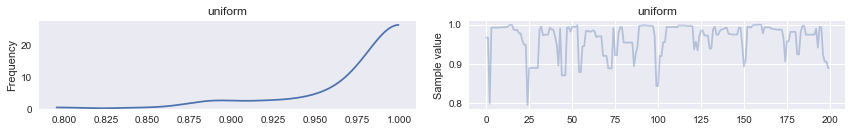

In [59]:
#Beta(1,1) -> DISTRIBUCIÓN UNIFORME
uniform_model = pm.Model()
with uniform_model:
    # Priors for unknown model parameters
    p_u = pm.Beta('uniform', alpha=1, beta=1)
    
    # Model
    y = pm.Binomial('y', n=n, p=p_u, observed=heads)
    
    # Posterior sampling
    trace_uniform = pm.sample(n_iter)
    
    # Posterior plot
    start = {'p_u_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace_uniform = pm.sample(n_iter, step=step, start=start, njobs=1, random_seed=123)
    map_uniform = pm.find_MAP()
    y_pred = pm.Binomial('y_pred', n=1, p=p_u)
    pred_uniform = pm.sample(n_iter, step=step, start=start, njobs=1, random_seed=12)

    pm.traceplot(trace_uniform, varnames=['uniform'])
    
plt.show()    

100%|██████████| 700/700 [00:00<00:00, 1804.12it/s]
logp = -1.7368, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1199.97it/s]
Assigned Metropolis to y_ub_pred
100%|██████████| 700/700 [00:00<00:00, 828.40it/s]


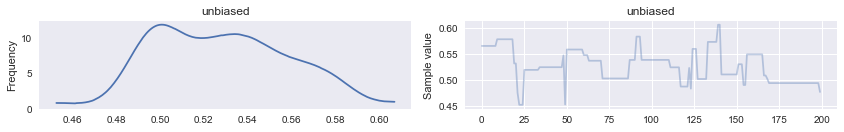

In [39]:
unbiased_model = pm.Model()
with unbiased_model:
    # Priors for unknown model parameters
    p_ub = pm.Beta('unbiased', alpha=100., beta=100.)
    
    # Model
    y_ub = pm.Binomial('y_ub', n=n, p=p_ub, observed=heads)
    
    # Muestra a posteriori
    start = {'p_ub_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace_unbiased = pm.sample(n_iter, step=step, start=start, njobs=1, random_seed=123)
    map_unbiased = pm.find_MAP()
    y_ub_pred = pm.Binomial('y_ub_pred', n=1, p=p_ub)
    pred_unbiased = pm.sample(n_iter, step=step, start=start, njobs=1, random_seed=12)

    pm.traceplot(trace_unbiased, varnames=['unbiased'])

plt.show()    

## 2. Resúmenes
 * Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.


In [83]:
print('MAP uniforme: ' + str(map_uniform['uniform']))
print('Media uniforme : ' + str(np.mean(trace_uniform.uniform)))

MAP uniforme: 0.999999615521
Media uniforme : 0.964915860283


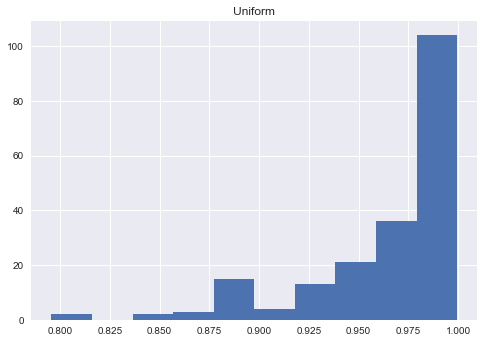

In [84]:
plt.hist(trace_uniform.uniform)
plt.title('Uniform')
plt.show()

In [85]:
print('MAP unbiased: ' + str(map_unbiased['unbiased']))
print('Media unbiased : ' + str(np.mean(trace_unbiased.unbiased)))

MAP unbiased: 0.514705882348
Media unbiased : 0.527246252119


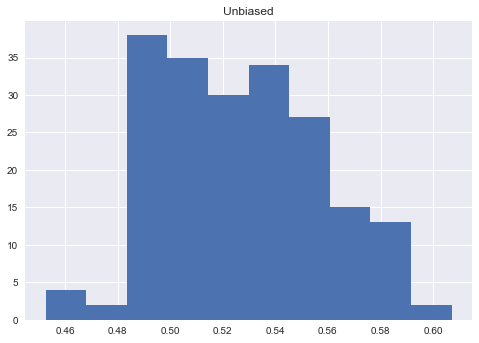

In [43]:
plt.hist(trace_unbiased.unbiased)
plt.title('Unbiased')
plt.show()

## 3. Predicción
 * Prediga, para ambos priors, el resultado de una nueva tirada de moneda.


In [87]:
# Posterior para otra tirada de modelo uniform
print('Posterior predicted for head, uniform: '+ str((pred_uniform.y_pred.sum()*1.0)/(len(pred_uniform.y_pred)*1.0)))


Posterior predicted for head, uniform: 0.855


In [88]:
# Posterior para otra tirada de modelo unbiased
print('Posterior predicted for head, unbiased: '+ str((pred_unbiased.y_ub_pred.sum()*1.0)/(len(pred_unbiased.y_ub_pred)*1.0)))

Posterior predicted for head, unbiased: 0.485


## 4. Otros datos
 * Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en la que se observan 3 caras de 3 tiradas. ¿Qué puede concluir de los priors elegidos? ¿Y del modelo en general?


In [92]:
#Los parámetros ingresados de alpha_val y beta_val definen el prior.
#Se crea el modelo binomial con el prior generado, el número de tiradas y la cantidad de caras observadas.
#Finalmente se grafican un histograma de los posteriores, las muestras que se generaron secuencialmente, y
#el máximo a posteriori (MAP) de las iteraciones ingresadas.
def bayesian_statistics(n,heads,n_iter,alpha_val,beta_val,title):
    #INPUTS:
    #n: número de tiradas
    #heads: número de caras
    #n_iter: número de iteraciones
    #alpha_val: valor del parámetro alpha de la distribución Beta
    #beta_val: valor del parámetro beta de la distribución Beta
    #title: el título de lo gráficos que se generan
    
    #OUTPUTS:
    #se generan gráficos del posterior y el MAP 
    model = pm.Model()

    with model:
        # Priors for unknown model parameters
        p = pm.Beta('p', alpha=alpha_val, beta=beta_val)
    
        # Model
        y = pm.Binomial('y', n=n, p=p, observed=heads)

        # Posterior
        start = {'p_logodds__': 13.385080233683778}
        step = pm.Metropolis()
        trace = pm.sample(n_iter, step=step, start=start, njobs=1, random_seed=123)
        map_result = pm.find_MAP()
        y_pred = pm.Binomial('y_pred', n=1, p=p) #  posterior para una tirada mas, contemplando el estado del modelo
        pred_y = pm.sample(n_iter, step=step, start=start, njobs=1, random_seed=12)

        pm.traceplot(trace, varnames=['p'])
    
    
    posterior = (pred_y.y_pred.sum()*1.0)/(len(pred_y.y_pred )*1.0)
    plt.title(title)
    plt.show()         

    map_result
    #plt.hist(trace.p)
    #plt.title(title)
    #plt.show()
    return posterior

100%|██████████| 700/700 [00:00<00:00, 2052.79it/s]
logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 1466.68it/s]  
Assigned Metropolis to y_pred
100%|██████████| 700/700 [00:00<00:00, 921.05it/s]


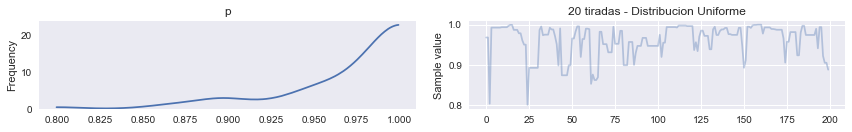

100%|██████████| 700/700 [00:00<00:00, 1654.85it/s]
logp = -11.441, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 1200.03it/s]
Assigned Metropolis to y_pred
100%|██████████| 700/700 [00:00<00:00, 830.37it/s]


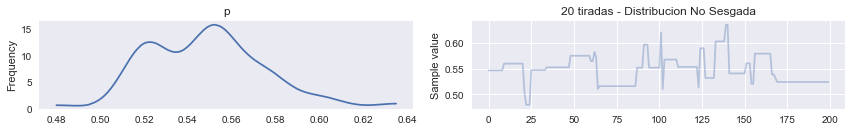

In [93]:
#20 tiradas
n = 20
heads = 20
n_iter = 200
alpha_val = 1
beta_val = 1
title = '20 tiradas - Distribucion Uniforme'
pospred_20u =bayesian_statistics(n,heads,n_iter,alpha_val,beta_val,title)

alpha_val = 100.
beta_val = 100.
title = '20 tiradas - Distribucion No Sesgada'
pospred_20ub = bayesian_statistics(n,heads,n_iter,alpha_val,beta_val,title)

In [94]:
# Posterior para otra tirada de modelo uniform
print('Posterior predicted for one more head after 20, uniform: '+ str(pospred_20u))
# Posterior para otra tirada de modelo unbiased
print('Posterior predicted for one more head after 20, unbiased: '+ str(pospred_20ub))


Posterior predicted for one more head after 20, uniform: 0.855
Posterior predicted for one more head after 20, unbiased: 0.485


100%|██████████| 700/700 [00:00<00:00, 2052.79it/s]
logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 1461.54it/s]  
Assigned Metropolis to y_pred
100%|██████████| 700/700 [00:00<00:00, 921.05it/s]


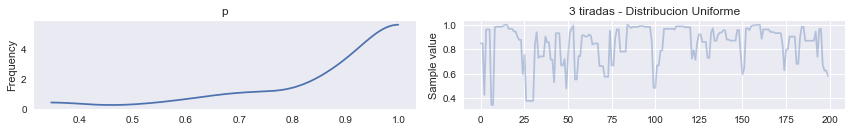

100%|██████████| 700/700 [00:00<00:00, 1785.71it/s]
logp = 0.34264, ||grad|| = 1.5: 100%|██████████| 5/5 [00:00<00:00, 1250.02it/s]
Assigned Metropolis to y_pred
100%|██████████| 700/700 [00:00<00:00, 823.53it/s]


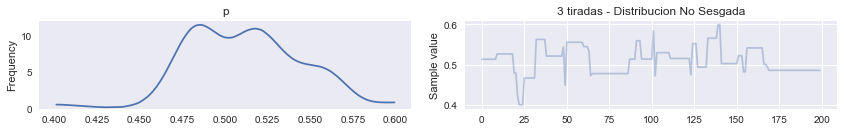

In [97]:
#3 tiradas
n = 3
heads = 3
n_iter = 200
alpha_val = 1
beta_val = 1
title = '3 tiradas - Distribucion Uniforme'

pospred_3u =bayesian_statistics(n,heads,n_iter,alpha_val,beta_val,title)

alpha_val = 100.
beta_val = 100.
title = '3 tiradas - Distribucion No Sesgada'

pospred_3ub =bayesian_statistics(n,heads,n_iter,alpha_val,beta_val,title)

In [99]:
# Posterior para otra tirada de modelo uniform
print('Posterior predicted for one more head after 3, uniform: '+ str(pospred_3u))
# Posterior para otra tirada de modelo unbiased
print('Posterior predicted for one more head after 3, unbiased: '+ str(pospred_3ub))

Posterior predicted for one more head after 3, uniform: 0.745
Posterior predicted for one more head after 3, unbiased: 0.48


Conclusión: 
Respecto de los priors, se observa que un prior en el que nuestra confianza en que la moneda no está cargada es alta (unbiased) el tener 3 o 20 caras casi no tiene impacto en los posteriors. En base a esto podemos concluir que un prior fuerte es muy poco sensible a la evidencia, o bien, que es necesario recoletar mucha mas evidencia para que modifique la creencia sobre la moneda.
Cuando el prior fue más laxo respecto a nuestra confianza en que la moneda estuviera cargada, se observo una sensibilidad mayor a la evidencia, como dicta la intuicion (20 tiradas de cara intuitivamente indicaria que la moneda esta cargada como muestran los resultados. 
Respecto del modelo en general, se puede concluir que la eleccion de los priors tiene un impacto fuerte en los resultados cuando la evidencia es escasa (pocas tiradas). Quiza es mas recomendable en estos casos usar priors menos fuertes.

## 5. Prior
 * Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.

100%|██████████| 700/700 [00:00<00:00, 1799.49it/s]
logp = -2.683, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 1199.97it/s]
Assigned Metropolis to y_pred
100%|██████████| 700/700 [00:00<00:00, 793.65it/s]


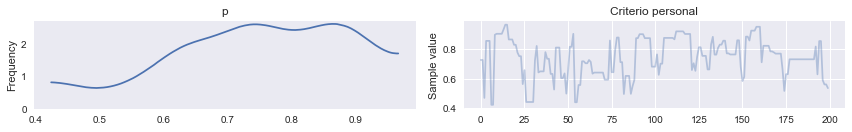

Posterior predicted for one more head, criterio personal: 0.545


In [150]:
# tiradas
n = 5
heads = 5
n_iter = 200

alpha_val = 4
beta_val = alpha_val
title = 'Criterio personal'
criterio_personal =bayesian_statistics(n,heads,n_iter,alpha_val,beta_val,title)
print('Posterior predicted for one more head, criterio personal: '+ str(criterio_personal))


Conclusión: Fijamos como evidencia intuitiva 5 caras de 5 tiradas (aunque sabemos que es un número pequeño de muestras para hacer estadística). Más allá del número de tiradas que intuitivamente nos haga desconfiar de si la moneda está cargada o no, se debe establecer un criterio mínimo de resultado sobre el cuál decidiremos si de hecho está cargada. Establecemos ese criterio en 0.5 o mayor.
En este caso, el Beta que nos convence que la moneda está cargada es aproximadamente 4 o menor.